In [60]:
#Ejecutar esta linea de comando para verificar que la versión de las librerías correspondan a los resultados expuestos en este notebook

!pip install -r requirements.txt

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime,date,timedelta


seed = 1234

np.random.seed(seed)

In [11]:
def get_data(filename):
    """Get data from the challenge csv file.

    Args:
        filename (str): location of the file
    """
    data = pd.read_csv(filename,infer_datetime_format=True,low_memory=False)
    data['Fecha-I'] = pd.to_datetime(data['Fecha-I'])
    data['Fecha-O'] = pd.to_datetime(data['Fecha-O'])

    return data

In [12]:
df = get_data('dataset_SCL.csv')
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


## 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

In [21]:
df.nunique()

Fecha-I      53252
Vlo-I          584
Ori-I            1
Des-I           64
Emp-I           30
Fecha-O      62774
Vlo-O          861
Ori-O            1
Des-O           63
Emp-O           32
DIA             31
MES             12
AÑO              2
DIANOM           7
TIPOVUELO        2
OPERA           23
SIGLAORI         1
SIGLADES        62
dtype: int64

In [50]:
print(df.groupby('DIANOM').DIANOM.count())
print(df.groupby('TIPOVUELO').TIPOVUELO.count())

DIANOM
Domingo       9796
Jueves       10251
Lunes        10131
Martes        9662
Miercoles     9722
Sabado        8352
Viernes      10292
Name: DIANOM, dtype: int64
TIPOVUELO
I    31240
N    36966
Name: TIPOVUELO, dtype: int64
OPERA
Grupo LATAM                 40892
Sky Airline                 14298
Aerolineas Argentinas        1949
Copa Air                     1850
Latin American Wings         1674
Avianca                      1152
JetSmart SPA                 1095
Gol Trans                     806
American Airlines             757
Air Canada                    565
Iberia                        362
Delta Air                     358
Air France                    358
Aeromexico                    351
United Airlines               335
Oceanair Linhas Aereas        279
Alitalia                      259
K.L.M.                        251
British Airways               205
Qantas Airways                195
Lacsa                          92
Austral                        74
Plus Ultra Lineas

In [51]:
print(df.groupby('OPERA').OPERA.count().sort_values(ascending=False))

OPERA
Grupo LATAM                 40892
Sky Airline                 14298
Aerolineas Argentinas        1949
Copa Air                     1850
Latin American Wings         1674
Avianca                      1152
JetSmart SPA                 1095
Gol Trans                     806
American Airlines             757
Air Canada                    565
Iberia                        362
Delta Air                     358
Air France                    358
Aeromexico                    351
United Airlines               335
Oceanair Linhas Aereas        279
Alitalia                      259
K.L.M.                        251
British Airways               205
Qantas Airways                195
Lacsa                          92
Austral                        74
Plus Ultra Lineas Aereas       49
Name: OPERA, dtype: int64


<AxesSubplot:xlabel='DIANOM'>

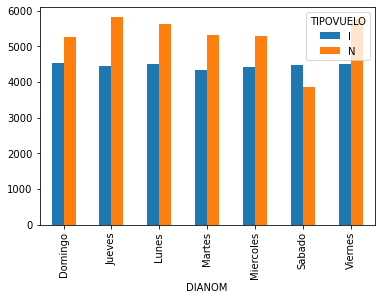

In [45]:
df.groupby(['TIPOVUELO','DIANOM']).count().iloc[:,0].unstack(level=0).plot(kind='bar')

<AxesSubplot:xlabel='OPERA'>

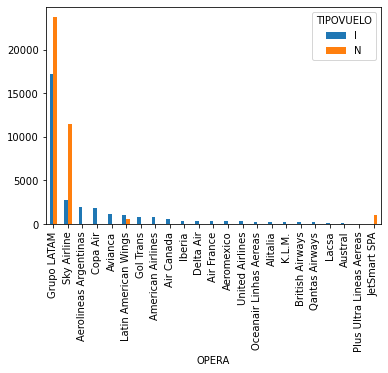

In [77]:
df.groupby(['TIPOVUELO','OPERA']).count().iloc[:,0].unstack(level=0).sort_values(by='I',ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='OPERA'>

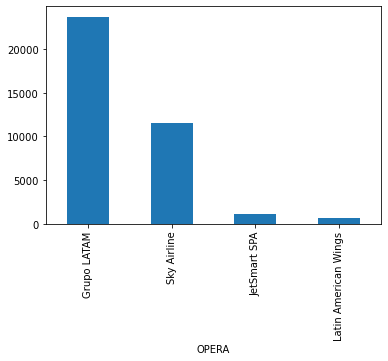

In [76]:
df.query("TIPOVUELO == 'N'").groupby(['OPERA']).count().iloc[:,0].sort_values(ascending=False).plot(kind='bar')

In [49]:
print(df.groupby('OPERA').OPERA.count().sort_values(ascending=False))

OPERA
Grupo LATAM                 40892
Sky Airline                 14298
Aerolineas Argentinas        1949
Copa Air                     1850
Latin American Wings         1674
Avianca                      1152
JetSmart SPA                 1095
Gol Trans                     806
American Airlines             757
Air Canada                    565
Iberia                        362
Delta Air                     358
Air France                    358
Aeromexico                    351
United Airlines               335
Oceanair Linhas Aereas        279
Alitalia                      259
K.L.M.                        251
British Airways               205
Qantas Airways                195
Lacsa                          92
Austral                        74
Plus Ultra Lineas Aereas       49
Name: OPERA, dtype: int64


In [59]:
df.groupby(['OPERA','TIPOVUELO']).OPERA.count().unstack(level=1)

TIPOVUELO,I,N
OPERA,,
Aerolineas Argentinas,1949.0,NaN
Aeromexico,351.0,NaN
Air Canada,565.0,NaN
Air France,358.0,NaN
Alitalia,259.0,NaN
American Airlines,757.0,NaN
Austral,74.0,NaN
Avianca,1152.0,NaN
British Airways,205.0,NaN


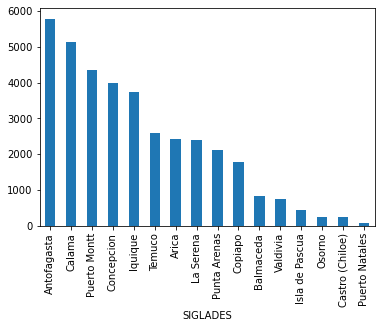

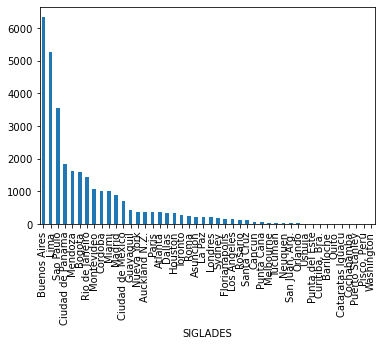

In [75]:
df.query("TIPOVUELO == 'N'").groupby('SIGLADES').count().iloc[:,0].sort_values(ascending=False).plot(kind='bar')
plt.show()
df.query("TIPOVUELO == 'I'").groupby('SIGLADES').count().iloc[:,0].sort_values(ascending=False).plot(kind='bar')
plt.show()

La gran mayoría de las variables presentadas en la base de datos son de tipo categóricas, salvo las relacionadas con la fecha, pero requieren alguna transformación para ser utilizadas en el análisis.

Con respecto a estas variables se puede destacar que:

Las clases de dia de la semana y tipo de vuelo están relativamente balanceadas, pero al aperturar los tipos de vuelo por aerolinea nos damos cuenta que hay sólo 4 aerolineas que operan vuelos de tipo nacional, mientras que las otras solo operan vuelos de tipo nacional. La aerolinea LATAM tiene la mayor presencia de vuelos en este aeropuerto, le sigue Sky, pero se nota que la clase está desbalanceada, para tener en cuenta.

Todas los vuelos se realizan desde el mismo origen, por lo tanto, son sólo despegues. En el caso de los vuelos nacionales, aparecen mayoritariamente los destinos Antofagasta, Calama, Puerto Montt, Concepción e Iquique, mientras que en el caso de los vuelos internacionales se presentan con mayoría vuelos en latinoamerica como Buenos Aires, Lima, Sao Paulo, Ciudad de Panamá, Mendoza, Bogotá y Río de Janeiro.